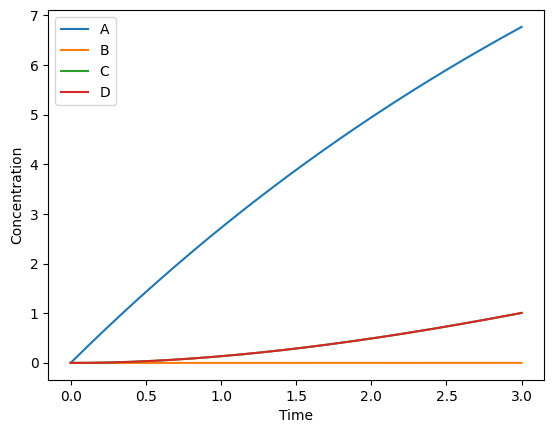

In [9]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# dydt is written as a function (like ode45 in MATLAB)
def ChemRxnNet_ODE(t, y):

    A,B,C,D = y # unpack y

    # parameters
    k1 = 3 # mM/s
    k2 = 2 # 1/s
    k3 = 2 # 1/(mM s)
    k4 = 3 # 1/s
    k5 = 4 # 1/s

    # differential equations
    dAdt = k1 - k2*A - k3*A*B 
    dBdt = k2*A - k3*A*B 
    dCdt = k3*A*B - k4*C 
    dDdt = k3*A*B - k5*D 

    dydt = [dAdt,dBdt,dCdt,dDdt] # repack dydt

    return dydt


# the time interval of the simulation
tspan = [0,3]

# set initial conditions
y0 = [0,0,0,0] # A, B, C, D

# integrate the ODE
sol = solve_ivp(ChemRxnNet_ODE, tspan, y0)

# plot the results
plt.plot(sol.t,sol.y.T)
plt.legend(['A','B','C','D'])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()
